In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
import matplotlib.pyplot as plt

### On cherche à régresser decision_o, qui est une variable binaire. Dans notre cas, une régression logistique est le modèle qui nous semble ainsi le plus approprié. 

In [24]:
df = pd.read_csv('data/speeddating modified.csv')

In [25]:
df_perso = pd.read_csv('data/speeddating personal.csv')

In [26]:
df2 = df.copy()

In [27]:
caractéristiques_fixes = ['race', 'age', 'sports', 'tvsports', 'exercise', 'dining', 'museums',
                          'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies',
                          'concerts', 'music', 'shopping', 'yoga']

In [28]:
variables_quantitatives = ['age', 'sports', 'tvsports', 'exercise', 'dining', 'museums',
                          'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies',
                          'concerts', 'music', 'shopping', 'yoga']

In [29]:
variables_qualitatives = ['race']

#### On vérifie s'il y a des valeurs manquantes

In [30]:
df2[caractéristiques_fixes].isna().any(axis=1).sum()

0

#### Il n'y en a pas on peut bien effectuer la régression logistique !

## Préparation des données

In [31]:
df2[caractéristiques_fixes].describe()

,age,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga
count,8209.000000,8209.000000,8209.000000,8209.000000,8209.000000,8209.000000,8209.000000,8209.000000,8209.000000,8209.000000,8209.000000,8209.000000,8209.000000,8209.000000,8209.000000,8209.000000,8209.000000,8209.000000
mean,26.355829,6.436716,4.579851,6.253868,7.802899,7.017542,6.741625,5.720794,3.887197,5.755878,7.690584,5.310391,6.804605,7.945791,6.858813,7.872092,5.653795,4.355342
std,3.570878,2.610645,2.803070,2.407928,1.733285,2.010495,2.227087,2.575754,2.621686,2.486826,1.993229,2.531265,2.197725,1.654299,2.127324,1.748353,2.609448,2.719785
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000
25%,24.000000,5.000000,2.000000,5.000000,7.000000,6.000000,5.000000,3.000000,2.000000,4.000000,7.000000,3.000000,5.000000,7.000000,6.000000,7.000000,4.000000,2.000000
50%,26.000000,7.000000,4.000000,6.000000,8.000000,7.000000,7.000000,6.000000,3.000000,6.000000,8.000000,6.000000,7.000000,8.000000,7.000000,8.000000,6.000000,4.000000
75%,28.000000,9.000000,7.000000,8.000000,9.000000,9.000000,8.000000,8.000000,6.000000,8.000000,9.000000,7.000000,9.000000,9.000000,8.000000,9.000000,8.000000,7.000000
max,55.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,14.000000,10.000000,13.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


#### On centre-réduit les variables quantitatives car on a également des variables catégorielles que l'on va encoder avec la méthode One-Hot Encoding.
#### De plus, les différences de variance sont relativement importantes entre certaines variables, cela nous permet d'harmoniser donc nos données.

In [32]:
to_scale = df2[variables_quantitatives]
scaler=StandardScaler()
scaler.fit(to_scale)

StandardScaler()

In [33]:
scaled_features = scaler.transform(to_scale) # Reduce and center the quantitative variables
scaled_features

array([[-1.49995453,  0.98191823, -0.92042245, ...,  0.64516568,
         0.89917407, -1.23375416],
       [-1.49995453,  0.98191823, -0.92042245, ...,  0.64516568,
         0.89917407, -1.23375416],
       [-1.49995453,  0.98191823, -0.92042245, ...,  0.64516568,
         0.89917407, -1.23375416],
       ...,
       [-0.37971373,  0.59884786, -0.92042245, ...,  1.21716752,
         0.51592797, -0.49835713],
       [-0.37971373,  0.59884786, -0.92042245, ...,  1.21716752,
         0.51592797, -0.49835713],
       [-0.37971373,  0.59884786, -0.92042245, ...,  1.21716752,
         0.51592797, -0.49835713]])

In [34]:
df_scaled = pd.DataFrame(scaled_features, columns=variables_quantitatives)
df_scaled

,age,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga
0,-1.499955,0.981918,-0.920422,0.725204,0.690697,-2.993247,-2.578245,-0.279855,-1.101342,-0.303971,-0.848215,1.457704,-2.641349,1.241815,1.47668,0.645166,0.899174,-1.233754
1,-1.499955,0.981918,-0.920422,0.725204,0.690697,-2.993247,-2.578245,-0.279855,-1.101342,-0.303971,-0.848215,1.457704,-2.641349,1.241815,1.47668,0.645166,0.899174,-1.233754
2,-1.499955,0.981918,-0.920422,0.725204,0.690697,-2.993247,-2.578245,-0.279855,-1.101342,-0.303971,-0.848215,1.457704,-2.641349,1.241815,1.47668,0.645166,0.899174,-1.233754
3,-1.499955,0.981918,-0.920422,0.725204,0.690697,-2.993247,-2.578245,-0.279855,-1.101342,-0.303971,-0.848215,1.457704,-2.641349,1.241815,1.47668,0.645166,0.899174,-1.233754
4,-1.499955,0.981918,-0.920422,0.725204,0.690697,-2.993247,-2.578245,-0.279855,-1.101342,-0.303971,-0.848215,1.457704,-2.641349,1.241815,1.47668,0.645166,0.899174,-1.233754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8204,-0.379714,0.598848,-0.920422,-0.520757,1.267671,1.483535,1.463155,0.496664,-1.101342,1.304603,0.155243,-0.912797,0.088913,0.637293,1.47668,1.217168,0.515928,-0.498357
8205,-0.379714,0.598848,-0.920422,-0.520757,1.267671,1.483535,1.463155,0.496664,-1.101342,1.304603,0.155243,-0.912797,0.088913,0.637293,1.47668,1.217168,0.515928,-0.498357
8206,-0.379714,0.598848,-0.920422,-0.520757,1.267671,1.483535,1.463155,0.496664,-1.101342,1.304603,0.155243,-0.912797,0.088913,0.637293,1.47668,1.217168,0.515928,-0.498357
8207,-0.379714,0.598848,-0.920422,-0.520757,1.267671,1.483535,1.463155,0.496664,-1.101342,1.304603,0.155243,-0.912797,0.088913,0.637293,1.47668,1.217168,0.515928,-0.498357


In [35]:
qltv_df = df2[['race']]
pfl_df = pd.get_dummies(qltv_df)
pfl_df

,race_asian/pacific islander/asian-american,race_black/african american,race_european/caucasian-american,race_latino/hispanic american,race_other
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
8204,0,0,1,0,0
8205,0,0,1,0,0
8206,0,0,1,0,0
8207,0,0,1,0,0


### On renomme les variables pour produire un graphique lisible

In [36]:
final_df = pd.concat([pfl_df, df_scaled], axis = 1)
final_df.rename(columns = {'race_asian/pacific islander/asian-american' : 'asian',
                             'race_black/african american': 'black',
                             'race_european/caucasian-american': 'caucasian',
                             'race_latino/hispanic american': 'latino'}, inplace = True)

In [37]:
final_df

,asian,black,caucasian,latino,race_other,age,sports,tvsports,exercise,dining,...,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga
0,1,0,0,0,0,-1.499955,0.981918,-0.920422,0.725204,0.690697,...,-1.101342,-0.303971,-0.848215,1.457704,-2.641349,1.241815,1.47668,0.645166,0.899174,-1.233754
1,1,0,0,0,0,-1.499955,0.981918,-0.920422,0.725204,0.690697,...,-1.101342,-0.303971,-0.848215,1.457704,-2.641349,1.241815,1.47668,0.645166,0.899174,-1.233754
2,1,0,0,0,0,-1.499955,0.981918,-0.920422,0.725204,0.690697,...,-1.101342,-0.303971,-0.848215,1.457704,-2.641349,1.241815,1.47668,0.645166,0.899174,-1.233754
3,1,0,0,0,0,-1.499955,0.981918,-0.920422,0.725204,0.690697,...,-1.101342,-0.303971,-0.848215,1.457704,-2.641349,1.241815,1.47668,0.645166,0.899174,-1.233754
4,1,0,0,0,0,-1.499955,0.981918,-0.920422,0.725204,0.690697,...,-1.101342,-0.303971,-0.848215,1.457704,-2.641349,1.241815,1.47668,0.645166,0.899174,-1.233754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8204,0,0,1,0,0,-0.379714,0.598848,-0.920422,-0.520757,1.267671,...,-1.101342,1.304603,0.155243,-0.912797,0.088913,0.637293,1.47668,1.217168,0.515928,-0.498357
8205,0,0,1,0,0,-0.379714,0.598848,-0.920422,-0.520757,1.267671,...,-1.101342,1.304603,0.155243,-0.912797,0.088913,0.637293,1.47668,1.217168,0.515928,-0.498357
8206,0,0,1,0,0,-0.379714,0.598848,-0.920422,-0.520757,1.267671,...,-1.101342,1.304603,0.155243,-0.912797,0.088913,0.637293,1.47668,1.217168,0.515928,-0.498357
8207,0,0,1,0,0,-0.379714,0.598848,-0.920422,-0.520757,1.267671,...,-1.101342,1.304603,0.155243,-0.912797,0.088913,0.637293,1.47668,1.217168,0.515928,-0.498357


In [38]:
x = final_df
y = df2['decision_o']

### Quelle modèle choisir ?

In [39]:
#fractionner dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

In [40]:
#instanciation du modèle
modele_regLog = LogisticRegression(random_state = 0,
solver = 'liblinear', multi_class = 'auto')
#training
modele_regLog.fit(x_train,y_train)
#précision du modèle
precision = modele_regLog.score(x_test,y_test)
print('précision de la régression logistique:', precision*100)

58.938139308329276


In [41]:
#instanciation du modèle
modele_regLin = LinearRegression()
#training
modele_regLin.fit(x_train,y_train)
#précision du modèle
precision = modele_regLin.score(x_test,y_test)
print('précision de la régression linéaire:', precision*100)

3.0949201494899548


### Même si la régression logistique n'est pas extrêmement précise, elle l'est bien plus que la régression linéaire.

In [42]:
results_df = pd.DataFrame(np.concatenate([modele_regLog.intercept_.reshape(-1,1),
                             modele_regLog.coef_],axis=1),
             index = ["coef"],
             columns = ["constante"]+list(x.columns)).T

In [43]:
sorted_df = results_df.sort_values('coef').transpose()
sorted_df

,asian,constante,gaming,race_other,museums,age,movies,tvsports,theater,tv,...,reading,caucasian,hiking,art,exercise,sports,dining,clubbing,shopping,latino
coef,-0.37121,-0.290028,-0.150614,-0.11565,-0.107059,-0.100046,-0.053104,-0.048447,-0.044271,-0.038691,...,0.023392,0.054714,0.055944,0.083386,0.092943,0.095924,0.103625,0.103741,0.136017,0.136746


#### Régression logistique de decision_o sur les caractéristiques fixes dans la population totale

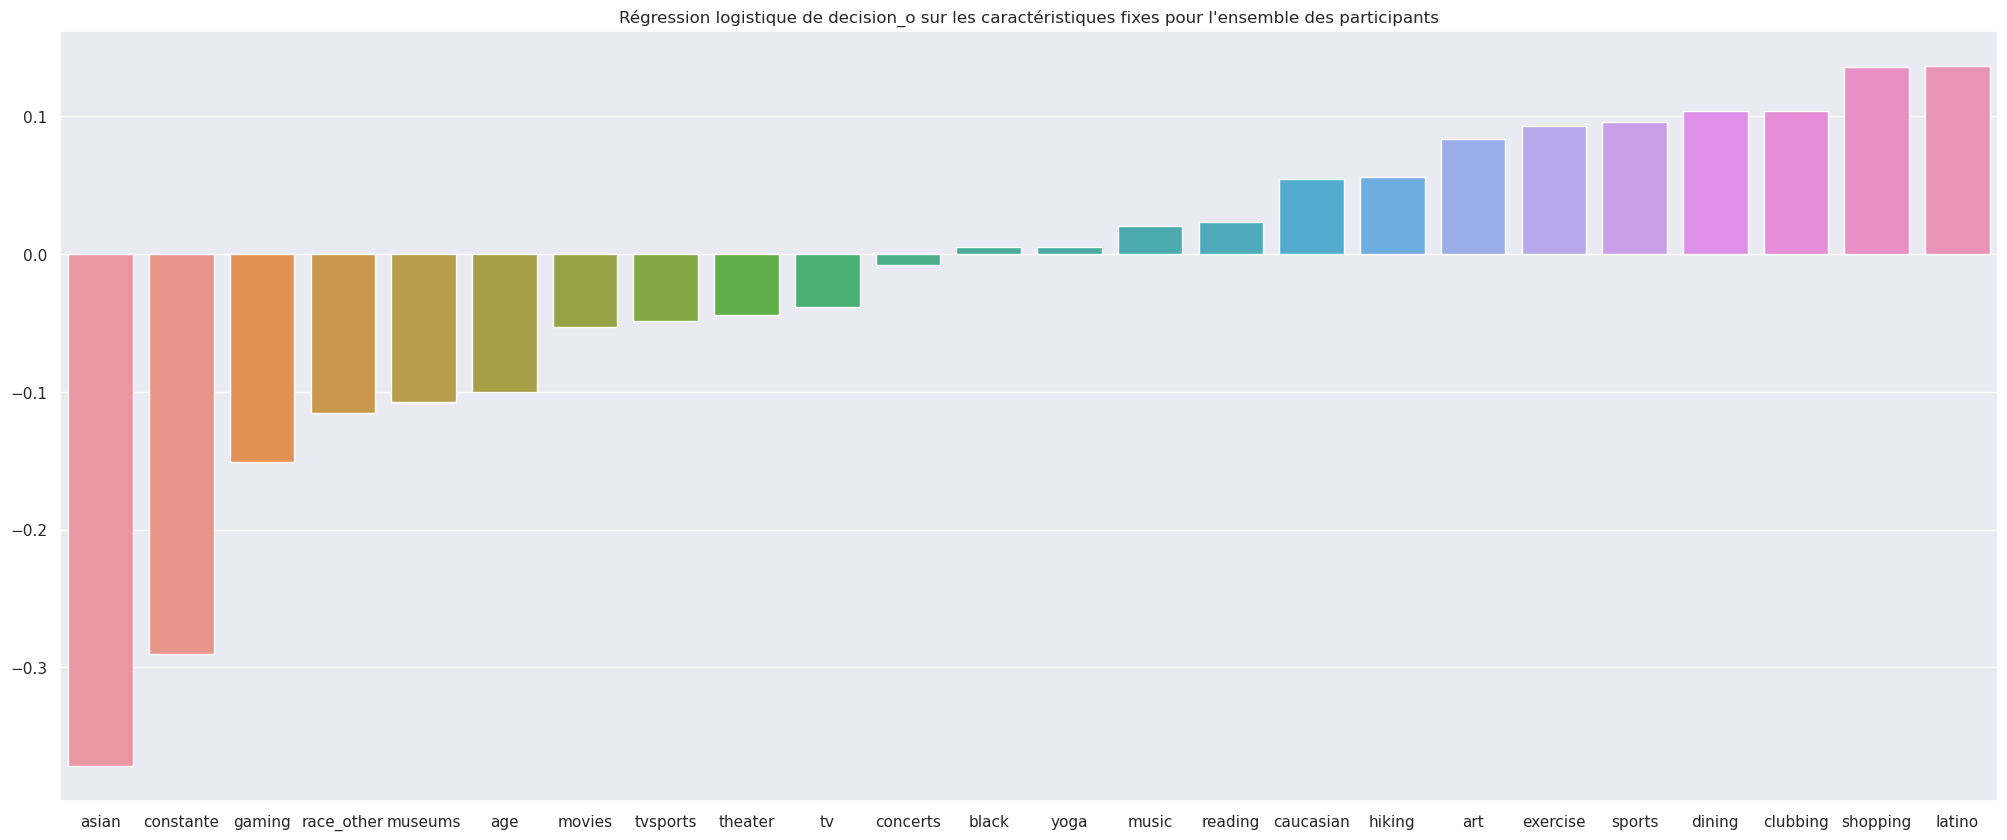

In [44]:
sns.set(rc={'figure.figsize':(25,10)}) # Augmenter la taille du graphique
sns.set(font_scale=1)
sns.barplot(sorted_df).set(title="Régression logistique de decision_o sur les caractéristiques fixes pour l'ensemble des participants")
plt.show()